compactness
width
groove
0.907142857143
0.857142857143


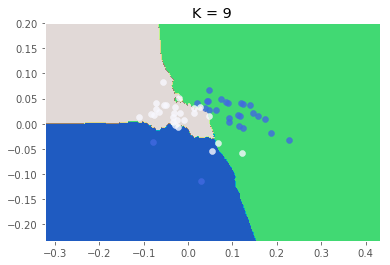

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot') # Look Pretty


def plotDecisionBoundary(model, X, y):
  fig = plt.figure()
  ax = fig.add_subplot(111)

  padding = 0.6
  resolution = 0.0025
  colors = ['royalblue','forestgreen','ghostwhite']


  # Calculate the boundaris
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()
  x_range = x_max - x_min
  y_range = y_max - y_min
  x_min -= x_range * padding
  y_min -= y_range * padding
  x_max += x_range * padding
  y_max += y_range * padding

  # Create a 2D Grid Matrix. The values stored in the matrix
  # are the predictions of the class at at said location
  xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

  # What class does the classifier say?
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the contour map
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.terrain)

  # Plot the test original points as well...
  for label in range(len(np.unique(y))):
    indices = np.where(y == label)
    plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], label=str(label), alpha=0.8)

  p = model.get_params()
  plt.axis('tight')
  plt.title('K = ' + str(p['n_neighbors']))


# 
# TODO: Load up the dataset into a variable called X. Check the .head and
# compare it to the file you loaded in a text editor. Make sure you're
# loading your data properly--don't fail on the 1st step!
#
# .. your code here ..
X = pd.read_csv("/Users/madushani/Google Drive/DataScience/DAT210x-master/Module5/Datasets/wheat.Data",index_col=0)
#X = X.dropna()
## Ensure there are no nan "holes" in your index, by reshaping row indices
#X = X.reset_index(drop=True)
#
# TODO: Copy the 'wheat_type' series slice out of X, and into a series
# called 'y'. Then drop the original 'wheat_type' column from the X
#
# .. your code here ..
wheat_type = X['wheat_type']
### Get rid of the wheat_type column.
X = X.drop(labels=['wheat_type'], axis=1)

#wheat_type = X['wheat_type'].copy()
#X.drop(labels=['wheat_type'], inplace=True, axis=1)

# TODO: Do a quick, "ordinal" conversion of 'y'. In actuality our
# classification isn't ordinal, but just as an experiment...
#
# .. your code here ..
wheat_type.unique()
wheat_type.value_counts()
ordered_wheat_type = ['canadian', 'rosa ', 'kama']

wheat_type = wheat_type.astype("category",
  ordered=True,
  categories=ordered_wheat_type
).cat.codes

import numpy as np
sum(wheat_type.apply(np.isnan))

#
# TODO: Basic nan munging. Fill each row's nans with the mean of the feature
#
# .. your code here ..
for elements in X.columns.values:
    if sum(X[elements].apply(np.isnan)) > 0:
        print(elements)
        X[elements] = X[elements].fillna( X[elements].mean())
        
#mylist = []
#for elements in X.columns.values:
   # if sum(X[elements].apply(np.isnan)) > 0:
        #mylist.append(elements)
#print(mylist)
# ['compactness', 'width', 'groove']



# TODO: Split X into training and testing data sets using train_test_split().
# INFO: Use 0.33 test size, and use random_state=1. This is important
# so that your answers are verifiable. In the real world, you wouldn't
# specify a random_state.
#
# .. your code here ..

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, wheat_type, test_size=0.33, random_state=1)
# 
# TODO: Create an instance of SKLearn's Normalizer class and then train it
# using its .fit() method against your *training* data.
#
# NOTE: The reason you only fit against your training data is because in a
# real-world situation, you'll only have your training data to train with!
# In this lab setting, you have both train+test data; but in the wild,
# you'll only have your training data, and then unlabeled data you want to
# apply your models to.
#
# .. your code here ..
from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(X_train) 
X_train_transformed = normalizer.transform(X_train) 


#
# TODO: With your trained pre-processor, transform both your training AND
# testing data.
#
# NOTE: Any testing data has to be transformed with your preprocessor
# that has ben fit against your training data, so that it exist in the same
# feature-space as the original data used to train your models.
#
# .. your code here ..
normalizer = preprocessing.Normalizer().fit(X_test) 
X_test_transformed = normalizer.transform(X_test)



#
# TODO: Just like your preprocessing transformation, create a PCA
# transformation as well. Fit it against your training data, and then
# project your training and testing features into PCA space using the
# PCA model's .transform() method.
#
# NOTE: This has to be done because the only way to visualize the decision
# boundary in 2D would be if your KNN algo ran in 2D as well:
#
# .. your code here ..

from sklearn.decomposition import PCA
pca_train = PCA(n_components=2, svd_solver='full')
pca_train.fit(X_train_transformed)
T_train = pca_train.transform(X_train_transformed)

T_test = pca_train.transform(X_test_transformed)


#
# TODO: Create and train a KNeighborsClassifier. Start with K=9 neighbors.
# NOTE: Be sure train your classifier against the pre-processed, PCA-
# transformed training data above! You do not, of course, need to transform
# your labels.
#
# .. your code here ..

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn_model = knn.fit(T_train, y_train)


# HINT: Ensure your KNeighbors classifier object from earlier is called 'knn'
#plotDecisionBoundary(knn_model, T_train, y_train)
plotDecisionBoundary(knn_model, T_test, y_test)

#------------------------------------
#
# TODO: Display the accuracy score of your test data/labels, computed by
# your KNeighbors model.
#
# NOTE: You do NOT have to run .predict before calling .score, since
# .score will take care of running your predictions for you automatically.
#
# .. your code here ..
print(knn_model.score(T_train,y_train))
print(knn_model.score(T_test,y_test))

#
# BONUS: Instead of the ordinal conversion, try and get this assignment
# working with a proper Pandas get_dummies for feature encoding. HINT:
# You might have to update some of the plotDecisionBoundary code.


plt.show()



In [100]:
X.head(10)

,area,perimeter,compactness,length,width,asymmetry,groove
id,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220000
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956000
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825000
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805000
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175000
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956000
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219000
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.407529
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877000


In [157]:
data_train.head(10)

,area,perimeter,compactness,length,width,asymmetry,groove
id,,,,,,,
147,12.49,13.46,0.86580,5.2670,2.967,4.421,5.002
78,18.94,16.49,0.87500,6.4450,3.639,5.064,6.362
117,19.15,16.45,0.88900,6.2450,3.815,3.084,6.185
42,13.16,13.55,0.90090,5.1380,3.201,2.461,4.783
17,15.69,14.75,0.90580,5.5270,3.514,1.599,5.046
5,14.38,14.21,0.89510,5.3860,3.312,2.462,4.956
154,11.36,13.05,0.83820,5.1750,2.755,4.048,5.263
171,11.55,13.10,0.84550,5.1670,2.845,6.715,4.956
48,14.79,14.52,0.88190,5.5450,3.291,2.704,5.111


0.842857142857


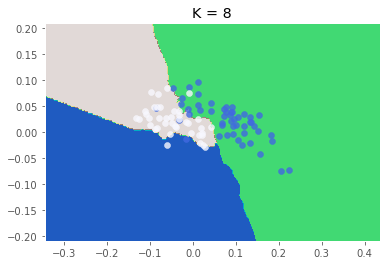

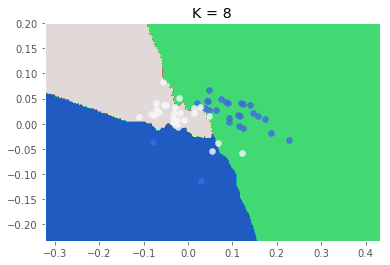

In [149]:
knn = KNeighborsClassifier(n_neighbors=8)
knn_model = knn.fit(T_train, y_train)
print(knn_model.score(T_test,y_test))
plotDecisionBoundary(knn_model, T_train, y_train)
plotDecisionBoundary(knn_model, T_test, y_test)
plt.show()

In [150]:
knn = KNeighborsClassifier(n_neighbors=7)
knn_model = knn.fit(T_train, y_train)
print(knn_model.score(T_test,y_test))

0.842857142857


In [151]:
knn = KNeighborsClassifier(n_neighbors=6)
knn_model = knn.fit(T_train, y_train)
print(knn_model.score(T_test,y_test))

0.842857142857


In [152]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(T_train, y_train)
print(knn_model.score(T_test,y_test))

0.842857142857


In [153]:
knn = KNeighborsClassifier(n_neighbors=4)
knn_model = knn.fit(T_train, y_train)
print(knn_model.score(T_test,y_test))

0.828571428571


0.857142857143


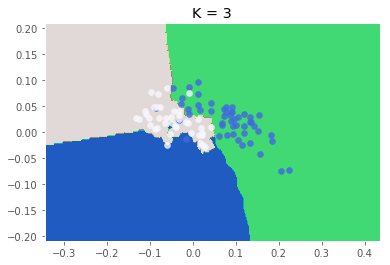

In [154]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(T_train, y_train)
print(knn_model.score(T_test,y_test))
plotDecisionBoundary(knn_model, T_train, y_train)
plt.show()

In [155]:
knn = KNeighborsClassifier(n_neighbors=2)
knn_model = knn.fit(T_train, y_train)
print(knn_model.score(T_test,y_test))

0.828571428571


In [156]:
knn = KNeighborsClassifier(n_neighbors=1)
knn_model = knn.fit(T_train, y_train)
print(knn_model.score(T_test,y_test))

0.871428571429


In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot') # Look Pretty
# 
# TODO: Load up the dataset into a variable called X. Check the .head and
# compare it to the file you loaded in a text editor. Make sure you're
# loading your data properly--don't fail on the 1st step!
#
# .. your code here ..
X = pd.read_csv("/Users/madushani/Google Drive/DataScience/DAT210x-master/Module5/Datasets/wheat.Data",index_col=0)
#X = X.dropna()
## Ensure there are no nan "holes" in your index, by reshaping row indices
#X = X.reset_index(drop=True)
#
# TODO: Copy the 'wheat_type' series slice out of X, and into a series
# called 'y'. Then drop the original 'wheat_type' column from the X
#
# .. your code here ..
wheat_type = X['wheat_type']
### Get rid of the wheat_type column.
X = X.drop(labels=['wheat_type'], axis=1)

#wheat_type = X['wheat_type'].copy()
#X.drop(labels=['wheat_type'], inplace=True, axis=1)

# TODO: Do a quick, "ordinal" conversion of 'y'. In actuality our
# classification isn't ordinal, but just as an experiment...
#
# .. your code here ..
wheat_type.unique()
wheat_type.value_counts()
ordered_wheat_type = ['canadian', 'rosa ', 'kama']
wheat_type = wheat_type.astype("category",
  ordered=True,
  categories=ordered_wheat_type
).cat.codes

import numpy as np
sum(wheat_type.apply(np.isnan))

#
# TODO: Basic nan munging. Fill each row's nans with the mean of the feature
#
# .. your code here ..
for elements in X.columns.values:
    if sum(X[elements].apply(np.isnan)) > 0:
        print(elements)
        X[elements] = X[elements].fillna( X[elements].mean())
        
#mylist = []
#for elements in X.columns.values:
   # if sum(X[elements].apply(np.isnan)) > 0:
        #mylist.append(elements)
#print(mylist)
# ['compactness', 'width', 'groove']



# TODO: Split X into training and testing data sets using train_test_split().
# INFO: Use 0.33 test size, and use random_state=1. This is important
# so that your answers are verifiable. In the real world, you wouldn't
# specify a random_state.
#
# .. your code here ..

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, wheat_type, test_size=0.33, random_state=1)
# 
# TODO: Create an instance of SKLearn's Normalizer class and then train it
# using its .fit() method against your *training* data.
#
# NOTE: The reason you only fit against your training data is because in a
# real-world situation, you'll only have your training data to train with!
# In this lab setting, you have both train+test data; but in the wild,
# you'll only have your training data, and then unlabeled data you want to
# apply your models to.
#
# .. your code here ..
from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(X_train) 
X_train_transformed = normalizer.transform(X_train) 


#
# TODO: With your trained pre-processor, transform both your training AND
# testing data.
#
# NOTE: Any testing data has to be transformed with your preprocessor
# that has ben fit against your training data, so that it exist in the same
# feature-space as the original data used to train your models.
#
# .. your code here ..
normalizer = preprocessing.Normalizer().fit(X_test) 
X_test_transformed = normalizer.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn_model = knn.fit(X_train_transformed, y_train)

print(knn_model.score(X_train_transformed,y_train)) ##training error
print(knn_model.score(X_test_transformed,y_test)) ##test error



compactness
width
groove
0.921428571429
0.885714285714


In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot') # Look Pretty
# 
# TODO: Load up the dataset into a variable called X. Check the .head and
# compare it to the file you loaded in a text editor. Make sure you're
# loading your data properly--don't fail on the 1st step!
#
# .. your code here ..
X = pd.read_csv("/Users/madushani/Google Drive/DataScience/DAT210x-master/Module5/Datasets/wheat.Data",index_col=0)
#X = X.dropna()
## Ensure there are no nan "holes" in your index, by reshaping row indices
#X = X.reset_index(drop=True)
#
# TODO: Copy the 'wheat_type' series slice out of X, and into a series
# called 'y'. Then drop the original 'wheat_type' column from the X
#
# .. your code here ..
wheat_type = X['wheat_type']
### Get rid of the wheat_type column.
X = X.drop(labels=['wheat_type'], axis=1)

#wheat_type = X['wheat_type'].copy()
#X.drop(labels=['wheat_type'], inplace=True, axis=1)

# TODO: Do a quick, "ordinal" conversion of 'y'. In actuality our
# classification isn't ordinal, but just as an experiment...
#
# .. your code here ..

wheat_type = pd.get_dummies(wheat_type,columns=['wheat_type'])


#import numpy as np
#sum(wheat_type.apply(np.isnan))

#
# TODO: Basic nan munging. Fill each row's nans with the mean of the feature
#
# .. your code here ..
for elements in X.columns.values:
    if sum(X[elements].apply(np.isnan)) > 0:
        print(elements)
        X[elements] = X[elements].fillna( X[elements].mean())
        

# TODO: Split X into training and testing data sets using train_test_split().
# INFO: Use 0.33 test size, and use random_state=1. This is important
# so that your answers are verifiable. In the real world, you wouldn't
# specify a random_state.
#
# .. your code here ..

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, wheat_type, test_size=0.33, random_state=1)
# 
# TODO: Create an instance of SKLearn's Normalizer class and then train it
# using its .fit() method against your *training* data.
#
# NOTE: The reason you only fit against your training data is because in a
# real-world situation, you'll only have your training data to train with!
# In this lab setting, you have both train+test data; but in the wild,
# you'll only have your training data, and then unlabeled data you want to
# apply your models to.
#
# .. your code here ..
from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(X_train) 
X_train_transformed = normalizer.transform(X_train) 


#
# TODO: With your trained pre-processor, transform both your training AND
# testing data.
#
# NOTE: Any testing data has to be transformed with your preprocessor
# that has ben fit against your training data, so that it exist in the same
# feature-space as the original data used to train your models.
#
# .. your code here ..
normalizer = preprocessing.Normalizer().fit(X_test) 
X_test_transformed = normalizer.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn_model = knn.fit(X_train_transformed, y_train)

print(knn_model.score(X_train_transformed,y_train)) ##training error
print(knn_model.score(X_test_transformed,y_test)) ##test error


compactness
width
groove
0.914285714286
0.885714285714


In [183]:
pred = knn.predict(X_test_transformed)
#import numpy as np
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.885714285714


In [202]:
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
#neighbors = filter(lambda x: x % 2 != 0, myList)
neighbors = []
for items in myList:
    if items % 2 != 0:
        neighbors.append(items)


# empty list that will hold cv scores
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_transformed, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is: 3


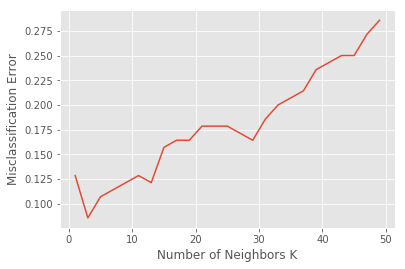

In [203]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is:", optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [204]:
knn = KNeighborsClassifier(n_neighbors=3)
knn_model = knn.fit(X_train_transformed, y_train)

#print(knn_model.score(X_train_transformed,y_train)) ##training error
print(knn_model.score(X_test_transformed,y_test)) ##test error


0.871428571429
